In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Import necessary libraries
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/DataMining/ObesityDataSet_raw_and_data_sinthetic.csv'
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


Text(0.5, 1.0, 'Physical activity doing Distribution')

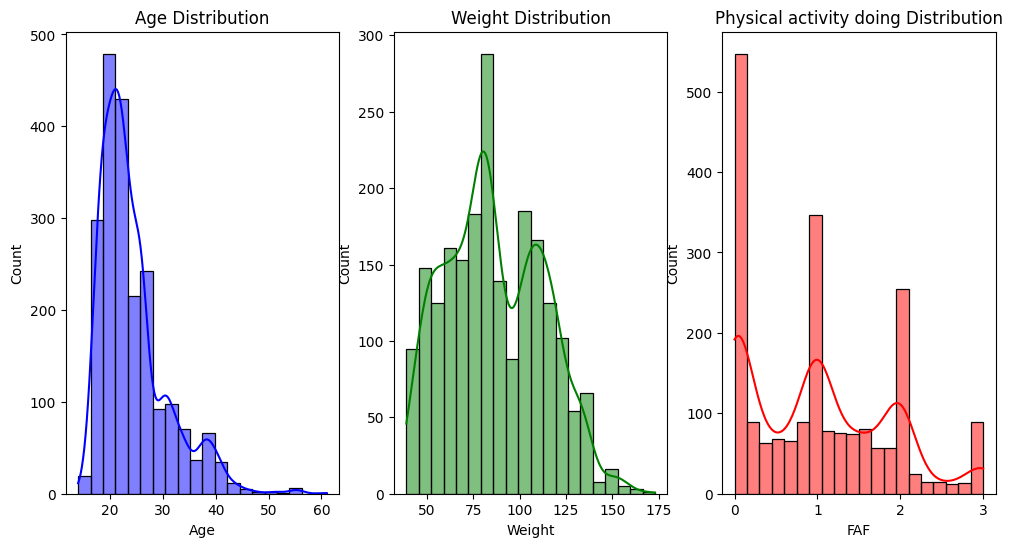

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for Age, Weight, and Calorie consumption
plt.figure(figsize=(12, 6))

# Age Distribution
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], kde=True, bins=20, color='blue')
plt.title("Age Distribution")

# Weight Distribution
plt.subplot(1, 3, 2)
sns.histplot(df['Weight'], kde=True, bins=20, color='green')
plt.title("Weight Distribution")

#  Distribution Of How Often Doing Physical Activity
plt.subplot(1, 3, 3)
sns.histplot(df['FAF'], kde=True, bins=20, color='red')
plt.title("Physical activity doing Distribution")

<ipython-input-4-735a1bd4d7b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='NObeyesdad', data=df, palette='Set2')


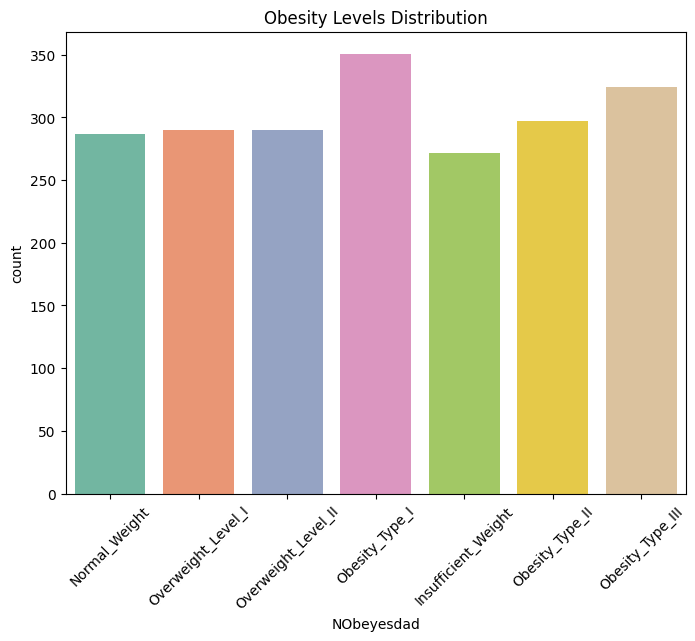

In [ ]:
# Distribution of Obesity Levels (NObeyesdad)
plt.figure(figsize=(8, 6))
sns.countplot(x='NObeyesdad', data=df, palette='Set2')
plt.title("Obesity Levels Distribution")
plt.xticks(rotation=45)
plt.show()


<ipython-input-5-60d1e1fcc6be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FAVC', data=df, palette='coolwarm')
<ipython-input-5-60d1e1fcc6be>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CALC', data=df, palette='coolwarm')


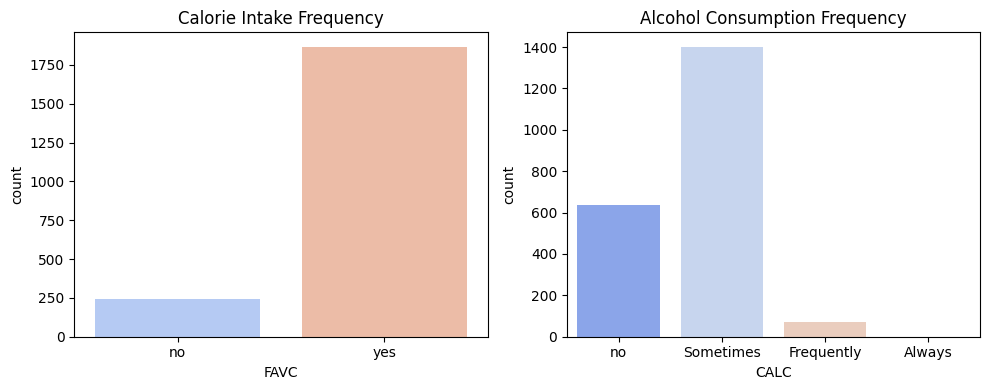

In [ ]:
# Visualize Calorie Intake and Alcohol Consumption
plt.figure(figsize=(10, 4))

# Calorie Intake (FAVC)
plt.subplot(1, 2, 1)
sns.countplot(x='FAVC', data=df, palette='coolwarm')
plt.title("Calorie Intake Frequency")

# Alcohol Consumption (CALC)
plt.subplot(1, 2, 2)
sns.countplot(x='CALC', data=df, palette='coolwarm')
plt.title("Alcohol Consumption Frequency")

plt.tight_layout()
plt.show()


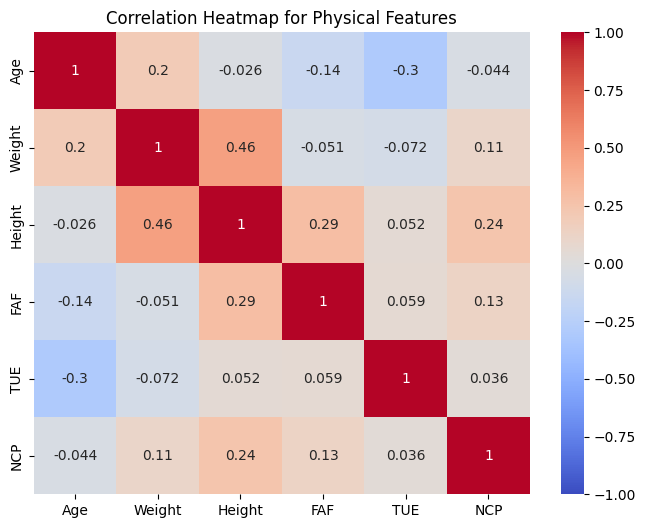

In [ ]:
# Calculate correlation matrix
correlation_matrix = df[['Age', 'Weight', 'Height', 'FAF', 'TUE','NCP']].corr()

# Plot heatmap of correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap for Physical Features")
plt.show()


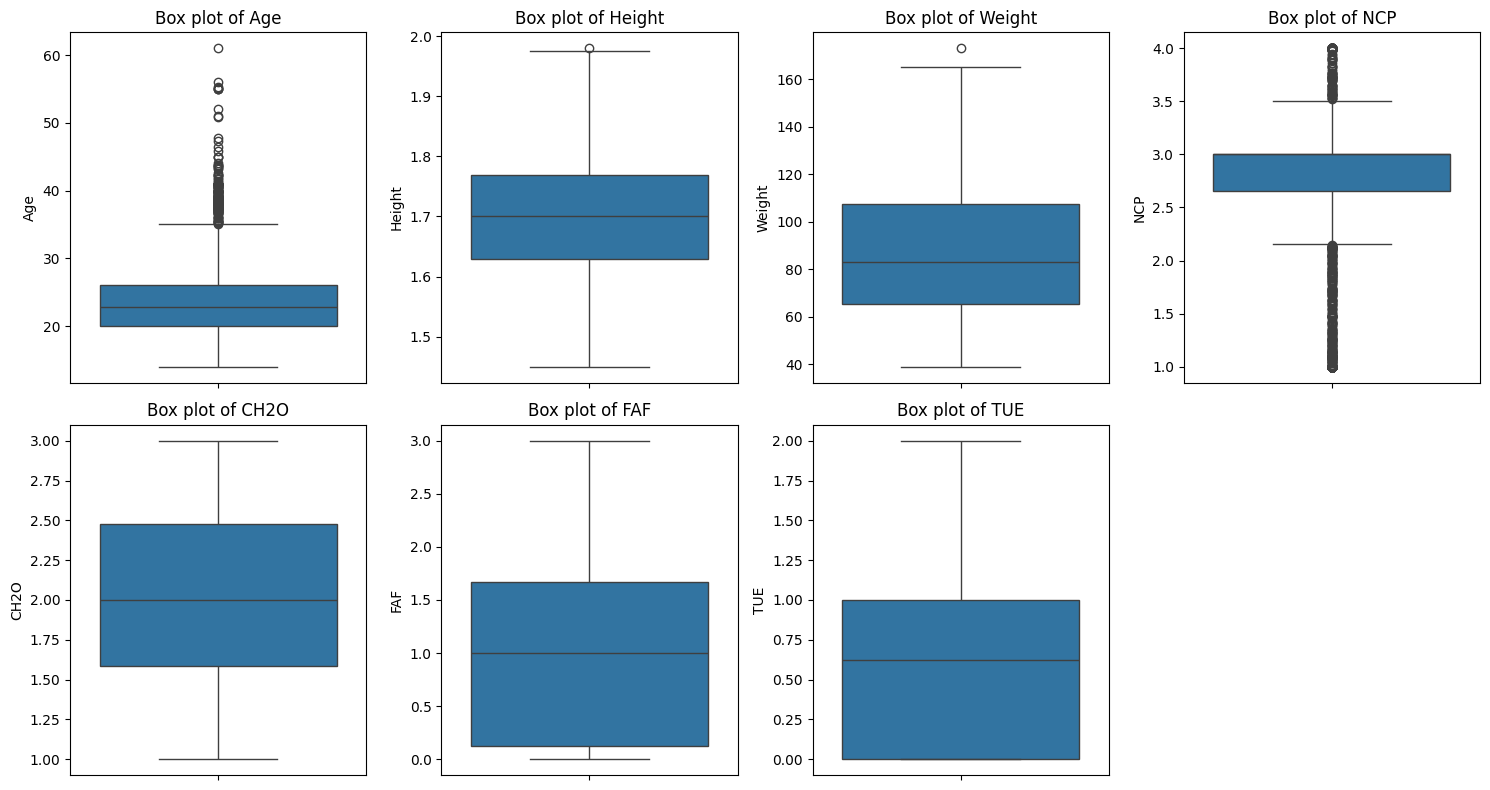

In [ ]:
#  Handling Outliers
continuous_features = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']
plt.figure(figsize=(15, 8))
for i, col in enumerate(continuous_features, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(df[col])
    plt.title(f"Box plot of {col}")
plt.tight_layout()
plt.show()

In [ ]:
# 2. Standardization of continuous variables
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()
continuous_features = ['Age', 'Height', 'Weight', 'NCP', 'CH2O', 'FAF', 'TUE']

df[continuous_features] = scaler.fit_transform(df[continuous_features])
print(df[continuous_features].head())

        Age    Height    Weight       NCP      CH2O       FAF       TUE
0 -0.522124 -0.875589 -0.862558  0.404153 -0.013073 -1.188039  0.561997
1 -0.522124 -1.947599 -1.168077  0.404153  1.618759  2.339750 -1.080625
2 -0.206889  1.054029 -0.366090  0.404153 -0.013073  1.163820  0.561997
3  0.423582  1.054029  0.015808  0.404153 -0.013073  1.163820 -1.080625
4 -0.364507  0.839627  0.122740 -2.167023 -0.013073 -1.188039 -1.080625


In [ ]:

# Specify multi-class categorical features
multi_class_features = ['Gender', 'CAEC', 'CALC', 'MTRANS']

df= pd.get_dummies(df, columns=multi_class_features, drop_first=True)

# Encode the target variable
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])

# Display the first few rows of the transformed data
print(df.head())


        Age    Height    Weight family_history_with_overweight FAVC  FCVC  \
0 -0.522124 -0.875589 -0.862558                            yes   no   2.0   
1 -0.522124 -1.947599 -1.168077                            yes   no   3.0   
2 -0.206889  1.054029 -0.366090                            yes   no   2.0   
3  0.423582  1.054029  0.015808                             no   no   3.0   
4 -0.364507  0.839627  0.122740                             no   no   2.0   

        NCP SMOKE      CH2O  SCC  ...  CAEC_Frequently  CAEC_Sometimes  \
0  0.404153    no -0.013073   no  ...            False            True   
1  0.404153   yes  1.618759  yes  ...            False            True   
2  0.404153    no -0.013073   no  ...            False            True   
3  0.404153    no -0.013073   no  ...            False            True   
4 -2.167023    no -0.013073   no  ...            False            True   

   CAEC_no  CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  \
0    False            F

In [ ]:

print("Dataset Shape:", df.shape)
print("Dataset Description:\n", df.describe())

Dataset Shape: (2111, 24)
Dataset Description:
                Age        Height       Weight         FCVC           NCP  \
count  2111.000000  2.111000e+03  2111.000000  2111.000000  2.111000e+03   
mean      0.000000 -1.346362e-17     0.000000     2.419043 -1.682953e-17   
std       1.000237  1.000237e+00     1.000237     0.533927  1.000237e+00   
min      -1.625448 -2.698006e+00    -1.817304     1.000000 -2.167023e+00   
25%      -0.688066 -7.683883e-01    -0.806291     2.000000 -3.456952e-02   
50%      -0.241897 -1.263207e-02    -0.136951     2.385502  4.041527e-01   
75%       0.265964  7.159595e-01     0.796053     3.000000  4.041527e-01   
max       5.782584  2.983646e+00     3.300136     3.000000  1.689740e+00   

               CH2O           FAF           TUE   NObeyesdad  
count  2.111000e+03  2.111000e+03  2.111000e+03  2111.000000  
mean   1.346362e-17  1.346362e-17 -1.346362e-17     3.015632  
std    1.000237e+00  1.000237e+00  1.000237e+00     1.952090  
min   -1.644905

In [ ]:
# Check the data types of the columns
print(df.dtypes)

Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
NObeyesdad                          int64
Gender_Male                          bool
CAEC_Frequently                      bool
CAEC_Sometimes                       bool
CAEC_no                              bool
CALC_Frequently                      bool
CALC_Sometimes                       bool
CALC_no                              bool
MTRANS_Bike                          bool
MTRANS_Motorbike                     bool
MTRANS_Public_Transportation         bool
MTRANS_Walking                    

In [ ]:

df_no_duplicates = df.drop_duplicates()

# Display DataFrame after removing duplicates
print("\nDataFrame after removing duplicates (all columns):")
print(df_no_duplicates)


DataFrame after removing duplicates (all columns):
           Age    Height    Weight  family_history_with_overweight  FAVC  \
0    -0.522124 -0.875589 -0.862558                               0     0   
1    -0.522124 -1.947599 -1.168077                               0     0   
2    -0.206889  1.054029 -0.366090                               0     0   
3     0.423582  1.054029  0.015808                               1     0   
4    -0.364507  0.839627  0.122740                               1     0   
...        ...       ...       ...                             ...   ...   
2106 -0.525774  0.097045  1.711763                               0     1   
2107 -0.367195  0.502844  1.800914                               0     1   
2108 -0.281909  0.541672  1.798868                               0     1   
2109  0.007776  0.404927  1.785780                               0     1   
2110 -0.102119  0.398344  1.790592                               0     1   

      FCVC       NCP  SMOKE      CH